___

<center><h1>Análisis Posicionamiento Youtube</h1></center>

___

<center><h2>Pragma</h2></center><br>
<center> Assessment Consultor Cientifico de Datos </center>

___
<p></p>
<center style="color: #AA6373; font-weight: 400;"><strong>Presentado por:</strong></center>
<center style="color: #AA6373; font-weight: 400;">Jorge Forero L.</center>

<center>Mayo 2025</center>
<p></p>

In [3]:
# --- Common Modules ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

# --- Data Preparation ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# --- Modelling ---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction import DictVectorizer

# --- Testing and Evaluation ---
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score, accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV


## Introduction

The current project was developed following CRISP-DM workflow. CRoss-Industry Standard Process for Data Mining (CRISP-DM) is the most commonly used methodology for analytics, data mining and analytics projects which provides an overview of the life cycle of a data mining project. CRISP-DM is a robust industry standard process which guides the analyst through a set of phases which cover all possible data mining situations.

## Business Understanding

The first phase is crucial to setting the project up for success by aligning the analysis with the business objectives. In this case, the problem revolves around the bank’s need to reduce customer churn by understanding key drivers behind why customers leave. With rising competition in the financial services industry, customer retention is more important than ever. The goal is to develop a predictive model that identifies customers at risk of churning, based on factors such as age, engagement, and financial behaviors. The optimal solution is a data-driven approach that empowers the bank to make informed decisions and implement retention strategies, using machine learning to predict churn and target high-risk customers with proactive interventions.

## Data Loading and Initial Exploration

In [4]:
with open('../data/US_category_id.json', 'r') as f:
    categories = json.load(f)

# Create a mapping of category IDs to category names
category_mapping = {}
for item in categories['items']:
    category_mapping[int(item['id'])] = item['snippet']['title']

print("Available categories:")
for cat_id, cat_name in category_mapping.items():
    print(f"{cat_id}: {cat_name}")

Available categories:
1: Film & Animation
2: Autos & Vehicles
10: Music
15: Pets & Animals
17: Sports
18: Short Movies
19: Travel & Events
20: Gaming
21: Videoblogging
22: People & Blogs
23: Comedy
24: Entertainment
25: News & Politics
26: Howto & Style
27: Education
28: Science & Technology
29: Nonprofits & Activism
30: Movies
31: Anime/Animation
32: Action/Adventure
33: Classics
34: Comedy
35: Documentary
36: Drama
37: Family
38: Foreign
39: Horror
40: Sci-Fi/Fantasy
41: Thriller
42: Shorts
43: Shows
44: Trailers


In [5]:
# Load the main video data
df = pd.read_csv('../data/USvideos.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
display(df.head())

print("\nDataset info:")
df.info()

Dataset shape: (40949, 16)

First few rows:


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null 

In [6]:
# Add category names to the dataframe
df['category_name'] = df['category_id'].map(category_mapping)

# Display basic statistics
print("Summary statistics:")
display(df.describe())

# Check for missing values
print("\nMissing values per column:")
display(df.isnull().sum())

Summary statistics:


,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06



Missing values per column:


video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
category_name               0
dtype: int64

### Data Description
An initial analysis on the data will provided the very first insights about it such as its nature, volume, and features. Finally, the Exploratory Data Analysis will be carried out in order to understand relationships between variables.

In [7]:
# Calculate and display dataset dimensions
rows, cols = df.shape
print(f"Dataset Dimensions:")
print(f"Number of videos: {rows:,}")
print(f"Number of features: {cols}")

# Display memory usage
memory_usage = df.memory_usage(deep=True).sum() / 1024**2  # Convert to MB
print(f"\nMemory usage: {memory_usage:.2f} MB")

# Display date range of the dataset
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
print(f"\nDate range: {df['trending_date'].min().strftime('%Y-%m-%d')} to {df['trending_date'].max().strftime('%Y-%m-%d')}")

Dataset Dimensions:
Number of videos: 40,949
Number of features: 17

Memory usage: 114.97 MB

Date range: 2017-11-14 to 2018-06-14


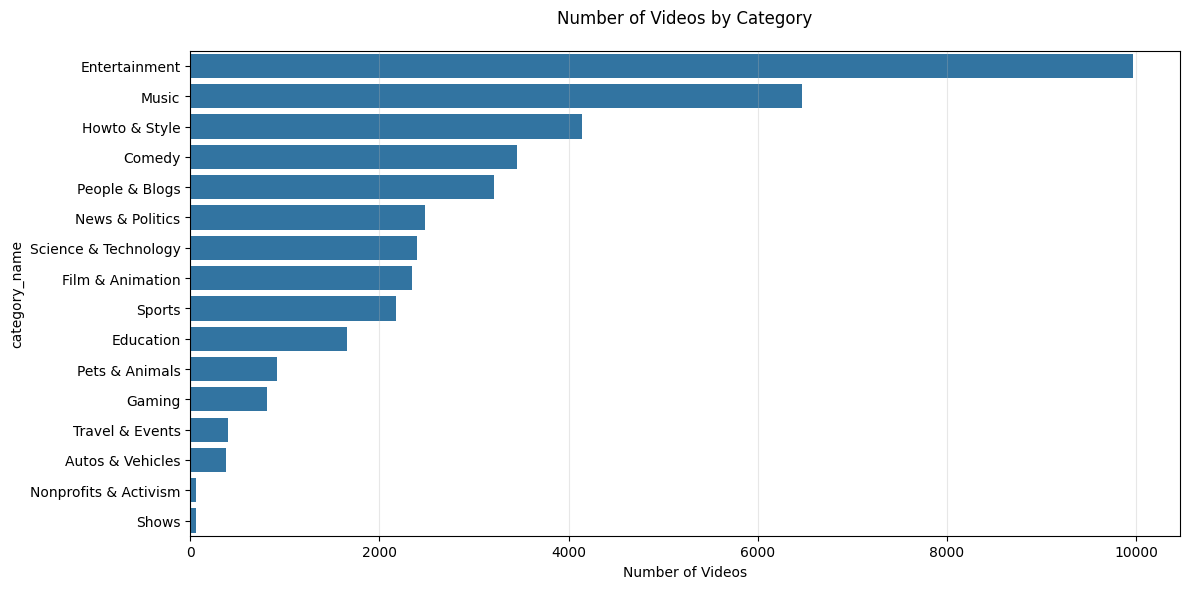


Videos per category:


category_name
Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: count, dtype: int64

In [9]:
# Set up the plotting style
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 10
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# 1. Distribution of videos across categories
plt.figure(figsize=(12, 6))
category_counts = df['category_name'].value_counts()
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Number of Videos by Category', pad=20)
plt.xlabel('Number of Videos')
plt.tight_layout()
plt.show()

# Display the exact counts
print("\nVideos per category:")
display(category_counts)

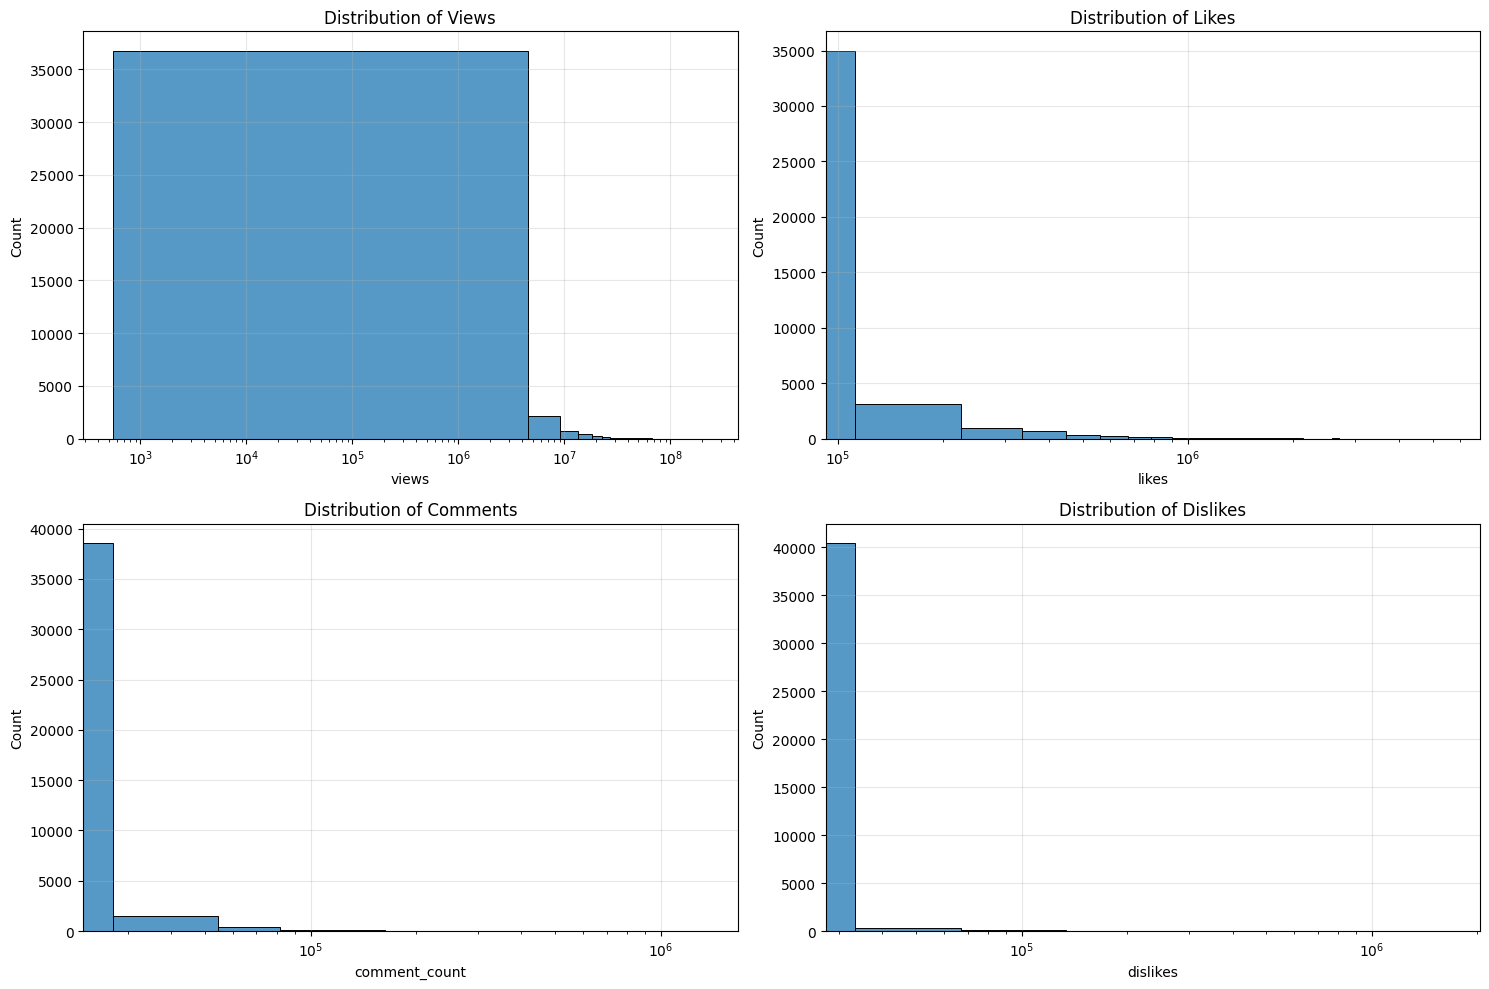

In [10]:
# 2. Engagement metrics distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Views distribution
sns.histplot(data=df, x='views', bins=50, ax=axes[0,0])
axes[0,0].set_title('Distribution of Views')
axes[0,0].set_xscale('log')

# Likes distribution
sns.histplot(data=df, x='likes', bins=50, ax=axes[0,1])
axes[0,1].set_title('Distribution of Likes')
axes[0,1].set_xscale('log')

# Comments distribution
sns.histplot(data=df, x='comment_count', bins=50, ax=axes[1,0])
axes[1,0].set_title('Distribution of Comments')
axes[1,0].set_xscale('log')

# Dislikes distribution
sns.histplot(data=df, x='dislikes', bins=50, ax=axes[1,1])
axes[1,1].set_title('Distribution of Dislikes')
axes[1,1].set_xscale('log')

plt.tight_layout()
plt.show()

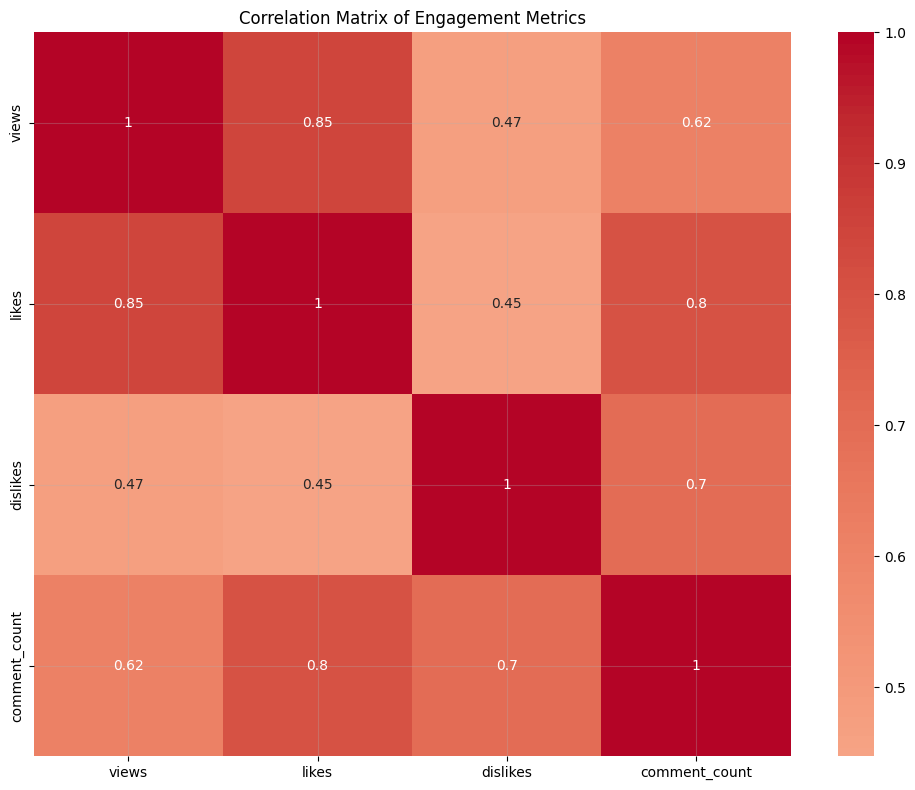


Correlation Matrix:


,views,likes,dislikes,comment_count
views,1.000000,0.849177,0.472213,0.617621
likes,0.849177,1.000000,0.447186,0.803057
dislikes,0.472213,0.447186,1.000000,0.700184
comment_count,0.617621,0.803057,0.700184,1.000000


In [11]:
# 3. Correlation between engagement metrics
engagement_metrics = ['views', 'likes', 'dislikes', 'comment_count']
correlation_matrix = df[engagement_metrics].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Engagement Metrics')
plt.tight_layout()
plt.show()

# Display the correlation matrix
print("\nCorrelation Matrix:")
display(correlation_matrix)

Summary Statistics for Engagement Metrics:


,views,likes,dislikes,comment_count
count,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06



Additional Metrics:
Average engagement rate: 3.89%
Median engagement rate: 3.20%


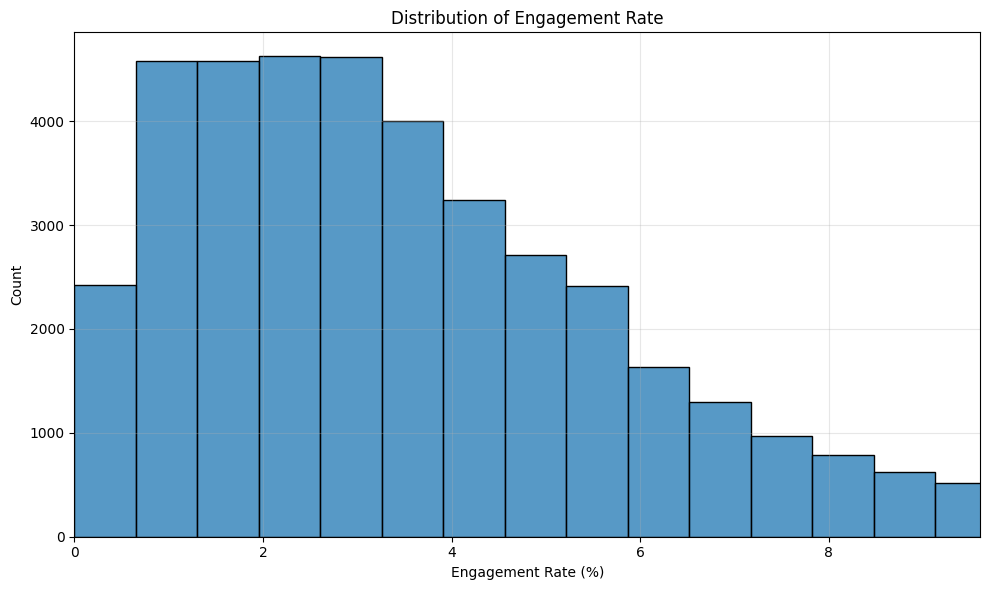

In [12]:
# 4. Summary statistics for engagement metrics
print("Summary Statistics for Engagement Metrics:")
summary_stats = df[engagement_metrics].describe()
display(summary_stats)

# Calculate additional metrics
print("\nAdditional Metrics:")
df['engagement_rate'] = (df['likes'] + df['comment_count']) / df['views'] * 100
print(f"Average engagement rate: {df['engagement_rate'].mean():.2f}%")
print(f"Median engagement rate: {df['engagement_rate'].median():.2f}%")

# Display engagement rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='engagement_rate', bins=50)
plt.title('Distribution of Engagement Rate')
plt.xlabel('Engagement Rate (%)')
plt.xlim(0, df['engagement_rate'].quantile(0.95))  # Remove extreme outliers
plt.tight_layout()
plt.show()

#### Data Cleaning

In [13]:
# 1. Check for missing values
print("Missing values per column:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
display(missing_info[missing_info['Missing Values'] > 0])

Missing values per column:


,Missing Values,Percentage
description,570,1.391975


In [14]:
# 2. Handle missing values
# Create a copy of the dataframe for cleaning
df_clean = df.copy()

# Fill missing values in description with empty string
df_clean['description'] = df_clean['description'].fillna('')

# Fill missing values in tags with empty string
df_clean['tags'] = df_clean['tags'].fillna('')

# Verify no missing values remain
print("Missing values after cleaning:")
display(df_clean.isnull().sum())

Missing values after cleaning:


video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
category_name             0
engagement_rate           0
dtype: int64

In [19]:
# 3. Convert date columns to datetime
df_clean['trending_date'] = (
    pd.to_datetime(df_clean['trending_date'], format='%y.%d.%m')
    # if trending_date ever comes in with a tz, remove it too
    .dt.tz_localize(None)
)
df_clean['publish_time'] = (
    pd.to_datetime(df_clean['publish_time'])
    # drop any timezone info here
    .dt.tz_localize(None)
)

# Extract additional date features
df_clean['publish_date'] = df_clean['publish_time'].dt.date
df_clean['publish_hour'] = df_clean['publish_time'].dt.hour
df_clean['publish_day'] = df_clean['publish_time'].dt.day_name()

# Calculate days until trending
df_clean['days_until_trending'] = (
    df_clean['trending_date'] - df_clean['publish_time']
).dt.days

print("Date columns converted and new features created.")

Date columns converted and new features created.


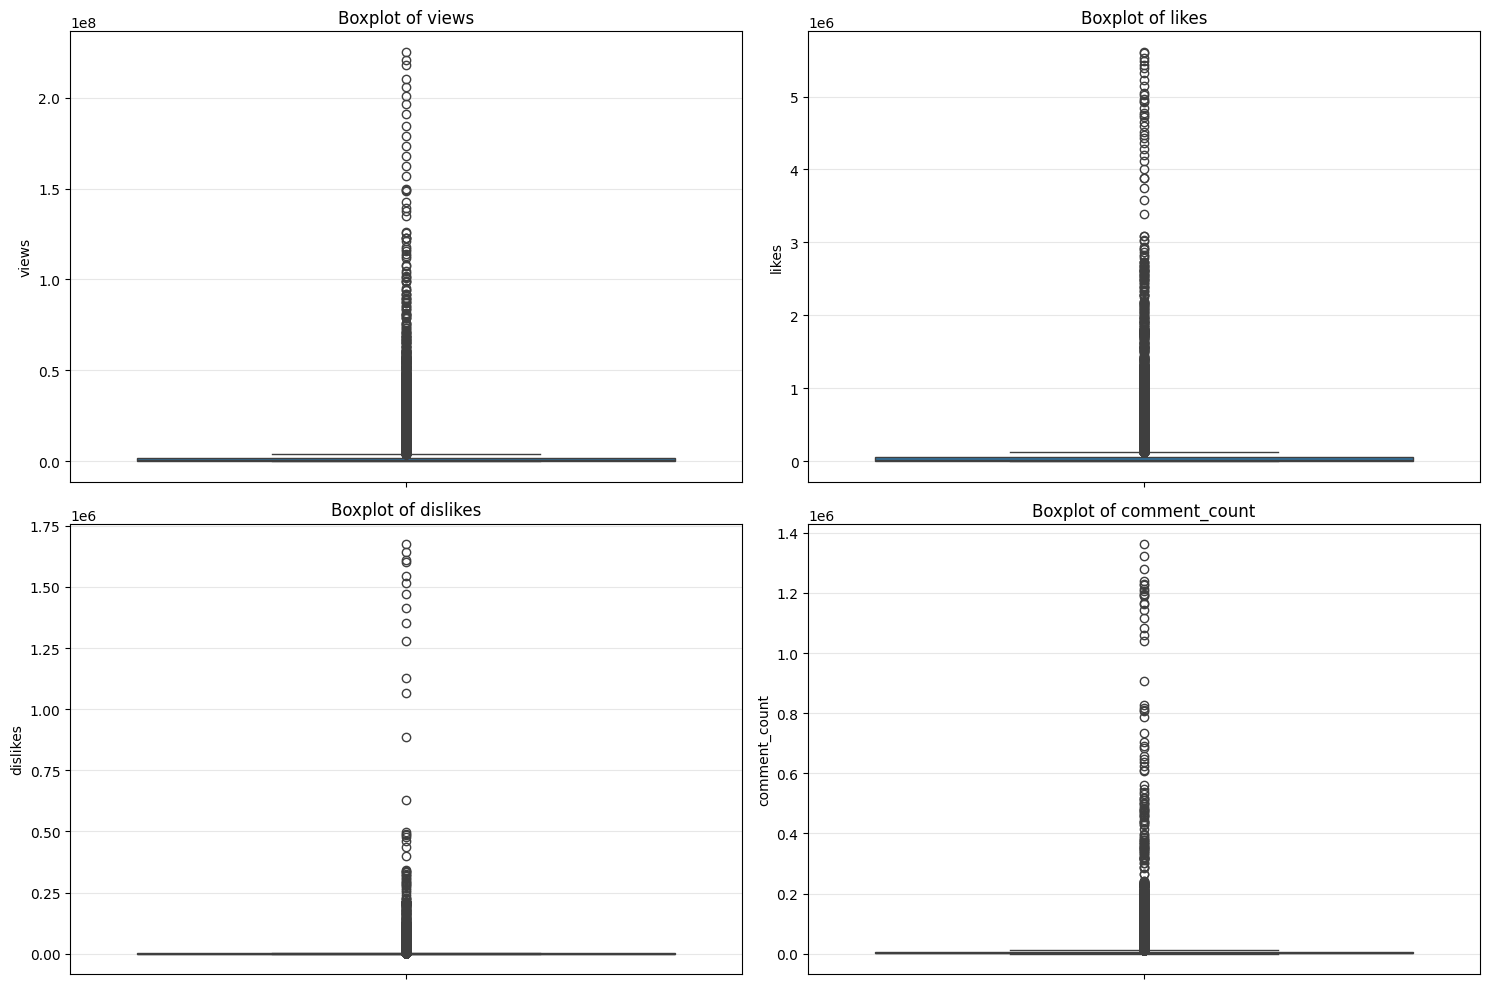


Outlier Statistics:

views:
Number of outliers: 4499
Percentage of outliers: 10.99%
Lower bound: -2,128,913
Upper bound: 4,194,399

likes:
Number of outliers: 5136
Percentage of outliers: 12.54%
Lower bound: -69,566
Upper bound: 130,406

dislikes:
Number of outliers: 5288
Percentage of outliers: 12.91%
Lower bound: -2,402
Upper bound: 4,542

comment_count:
Number of outliers: 5089
Percentage of outliers: 12.43%
Lower bound: -7,098
Upper bound: 13,466


In [33]:
# 4. Handle outliers in numerical columns
numerical_columns = ['views', 'likes', 'dislikes', 'comment_count']

# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Create boxplots to visualize outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_clean, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Print outlier statistics
print("\nOutlier Statistics:")
for column in numerical_columns:
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)]
    print(f"\n{column}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(df_clean))*100:.2f}%")
    print(f"Lower bound: {lower_bound:,.0f}")
    print(f"Upper bound: {upper_bound:,.0f}")

In [34]:
# 5. Create cleaned dataset without extreme outliers
df_final = df_clean.copy()

# Remove extreme outliers (keeping only values within 3 standard deviations)
for column in numerical_columns:
    mean = df_final[column].mean()
    std = df_final[column].std()
    df_final = df_final[(df_final[column] >= mean - 3*std) & (df_final[column] <= mean + 3*std)]

print(f"Original dataset shape: {df_clean.shape}")
print(f"Cleaned dataset shape: {df_final.shape}")
print(f"Rows removed: {df_clean.shape[0] - df_final.shape[0]}")
print(f"Percentage of data kept: {(df_final.shape[0]/df_clean.shape[0])*100:.2f}%")

Original dataset shape: (40949, 22)
Cleaned dataset shape: (38782, 22)
Rows removed: 2167
Percentage of data kept: 94.71%


In [36]:
# 6. Create additional features
# Calculate engagement metrics
df_final['engagement_rate'] = (df_final['likes'] + df_final['comment_count']) / df_final['views'] * 100
df_final['like_ratio'] = df_final['likes'] / (df_final['likes'] + df_final['dislikes'])

# Create time-based features
df_final['is_weekend'] = df_final['publish_time'].dt.dayofweek.isin([5, 6]).astype(int)
df_final['is_morning'] = ((df_final['publish_hour'] >= 5) & (df_final['publish_hour'] < 12)).astype(int)
df_final['is_afternoon'] = ((df_final['publish_hour'] >= 12) & (df_final['publish_hour'] < 17)).astype(int)
df_final['is_evening'] = ((df_final['publish_hour'] >= 17) & (df_final['publish_hour'] < 22)).astype(int)
df_final['is_night'] = ((df_final['publish_hour'] >= 22) | (df_final['publish_hour'] < 5)).astype(int)

print("Additional features created:")
print("1. Engagement rate")
print("2. Like ratio")
print("3. Time-based features (weekend, morning, afternoon, evening, night)")

Additional features created:
1. Engagement rate
2. Like ratio
3. Time-based features (weekend, morning, afternoon, evening, night)


## EDA

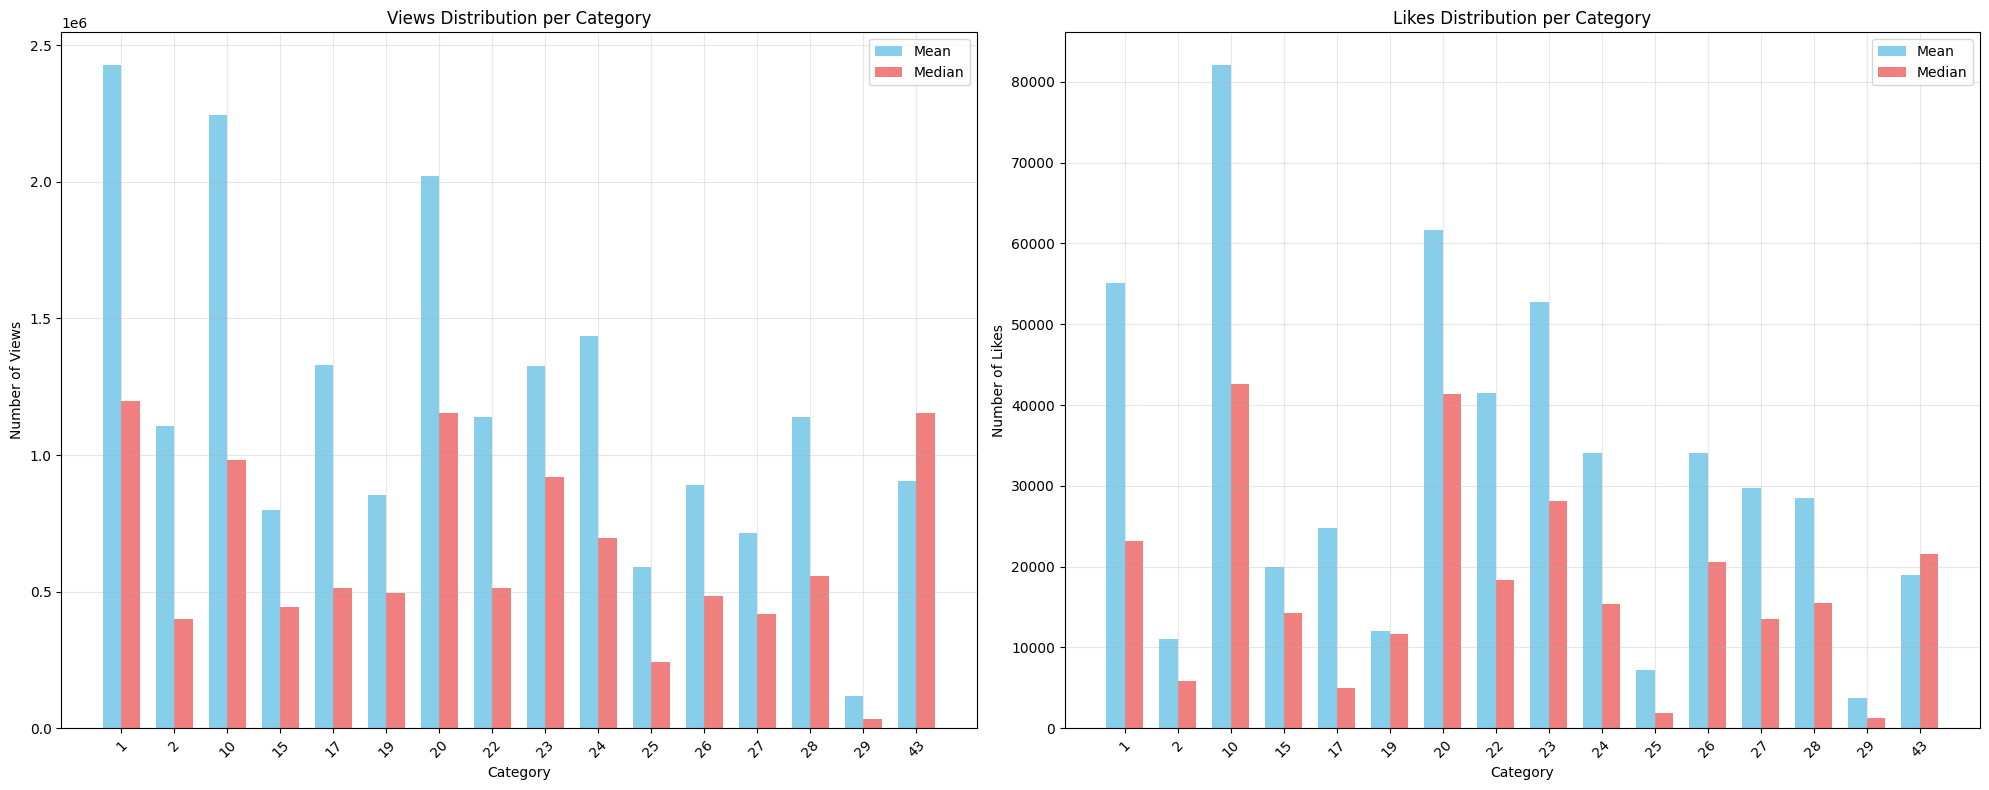


Views Summary per Category:

Mean Views:
category_id
1     2.425784e+06
2     1.104779e+06
10    2.243086e+06
15    7.980002e+05
17    1.330311e+06
19    8.546196e+05
20    2.021838e+06
22    1.137399e+06
23    1.325552e+06
24    1.436225e+06
25    5.896161e+05
26    8.890047e+05
27    7.129408e+05
28    1.138721e+06
29    1.194676e+05
43    9.035273e+05
Name: views, dtype: float64

Median Views:
category_id
1     1197180.5
2      400155.0
10     981626.0
15     442628.0
17     513957.0
19     494825.5
20    1153869.0
22     514444.0
23     917993.5
24     697391.0
25     241387.0
26     483300.0
27     419440.5
28     556386.0
29      33214.5
43    1155692.0
Name: views, dtype: float64

Likes Summary per Category:

Mean Likes:
category_id
1     55079.308559
2     11100.205263
10    82022.659946
15    19960.432640
17    24800.667638
19    12030.462687
20    61631.442815
22    41451.678349
23    52791.225913
24    34065.415153
25     7230.269809
26    34099.231762
27    29745.031401
28

In [38]:
# Read the data
df = pd.read_csv('../data/cleaned_youtube_data.csv')

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Calculate mean and median views per category
views_mean = df.groupby('category_id')['views'].mean()
views_median = df.groupby('category_id')['views'].median()

# Calculate mean and median likes per category
likes_mean = df.groupby('category_id')['likes'].mean()
likes_median = df.groupby('category_id')['likes'].median()

# Plot views distribution
x = np.arange(len(views_mean))
width = 0.35

ax1.bar(x - width/2, views_mean, width, label='Mean', color='skyblue')
ax1.bar(x + width/2, views_median, width, label='Median', color='lightcoral')
ax1.set_title('Views Distribution per Category')
ax1.set_xlabel('Category')
ax1.set_ylabel('Number of Views')
ax1.set_xticks(x)
ax1.set_xticklabels(views_mean.index, rotation=45)
ax1.legend()

# Plot likes distribution
ax2.bar(x - width/2, likes_mean, width, label='Mean', color='skyblue')
ax2.bar(x + width/2, likes_median, width, label='Median', color='lightcoral')
ax2.set_title('Likes Distribution per Category')
ax2.set_xlabel('Category')
ax2.set_ylabel('Number of Likes')
ax2.set_xticks(x)
ax2.set_xticklabels(likes_mean.index, rotation=45)
ax2.legend()

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Print numerical summary
print("\nViews Summary per Category:")
print("\nMean Views:")
print(views_mean)
print("\nMedian Views:")
print(views_median)

print("\nLikes Summary per Category:")
print("\nMean Likes:")
print(likes_mean)
print("\nMedian Likes:")
print(likes_median)

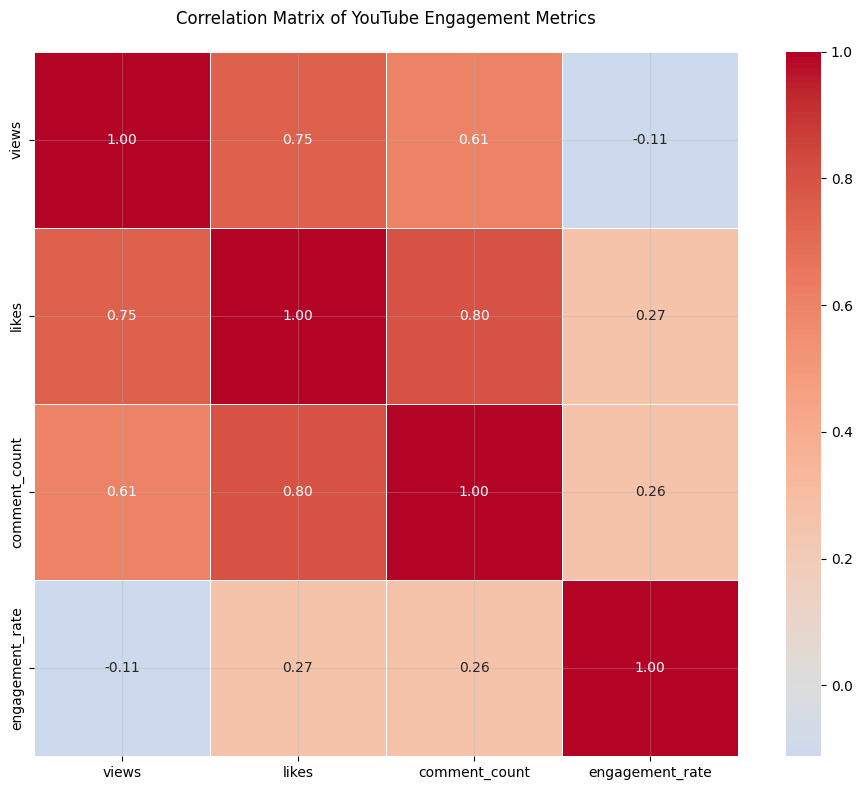


Detailed Correlation Matrix:
                    views     likes  comment_count  engagement_rate
views            1.000000  0.747449       0.605065        -0.112057
likes            0.747449  1.000000       0.796382         0.265297
comment_count    0.605065  0.796382       1.000000         0.258414
engagement_rate -0.112057  0.265297       0.258414         1.000000

Correlation Pairs:
views vs likes: 0.747
views vs comment_count: 0.605
views vs engagement_rate: -0.112
likes vs comment_count: 0.796
likes vs engagement_rate: 0.265
comment_count vs engagement_rate: 0.258


In [41]:
# Select the relevant columns for correlation analysis
correlation_columns = ['views', 'likes', 'comment_count', 'engagement_rate']
correlation_df = df[correlation_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Create a figure with a larger size for better visibility
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            fmt='.2f',  # Format correlation values to 2 decimal places
            square=True,  # Make the plot square-shaped
            linewidths=0.5)  # Add lines between cells

# Add a title
plt.title('Correlation Matrix of YouTube Engagement Metrics', pad=20)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Print the correlation matrix with more detailed information
print("\nDetailed Correlation Matrix:")
print(correlation_matrix)

# Print the correlation pairs in a more readable format
print("\nCorrelation Pairs:")
for i in range(len(correlation_columns)):
    for j in range(i+1, len(correlation_columns)):
        print(f"{correlation_columns[i]} vs {correlation_columns[j]}: {correlation_matrix.iloc[i,j]:.3f}")

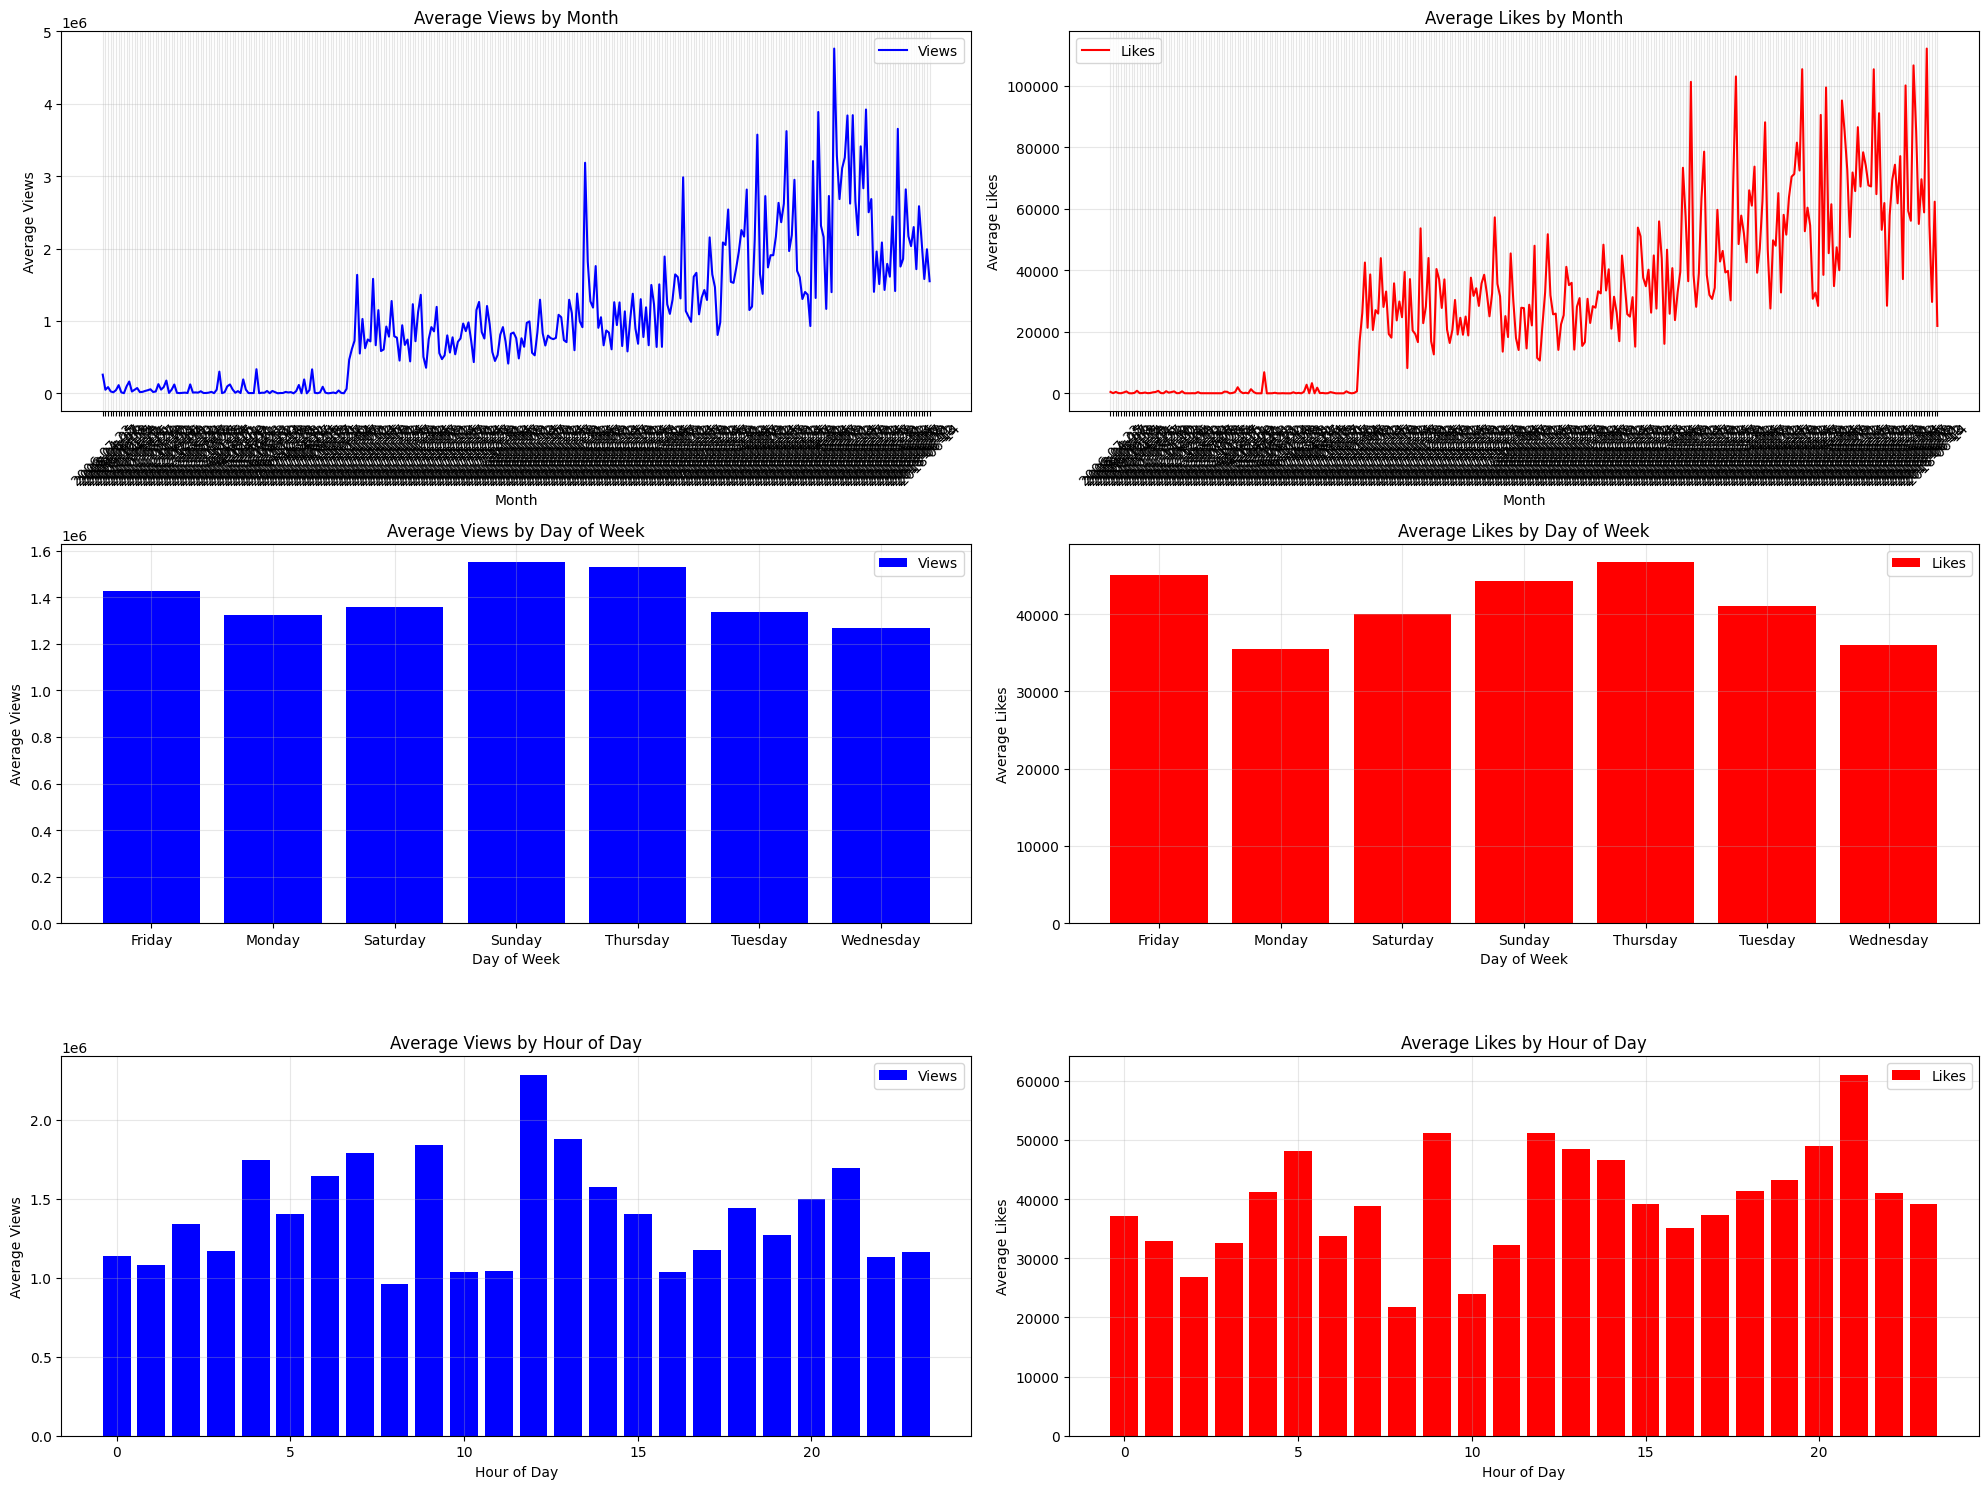


ANOVA Test Results:

Day of Week ANOVA:
Views - F-statistic: 11.66, p-value: 0.0000
Likes - F-statistic: 27.99, p-value: 0.0000

Hour of Day ANOVA:
Views - F-statistic: 30.78, p-value: 0.0000
Likes - F-statistic: 25.36, p-value: 0.0000

Month ANOVA:
Views - F-statistic: 19.69, p-value: 0.0000
Likes - F-statistic: 15.18, p-value: 0.0000

Interpretation:
If p-value < 0.05, there are significant differences between groups
If p-value >= 0.05, there are no significant differences between groups


In [42]:
# Create a figure with subplots for different time aggregations
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

# 1. Monthly aggregation
monthly_views = df.groupby('publish_date')['views'].mean()
monthly_likes = df.groupby('publish_date')['likes'].mean()

axes[0,0].plot(monthly_views.index, monthly_views.values, label='Views', color='blue')
axes[0,0].set_title('Average Views by Month')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Average Views')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend()

axes[0,1].plot(monthly_likes.index, monthly_likes.values, label='Likes', color='red')
axes[0,1].set_title('Average Likes by Month')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Average Likes')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend()

# 2. Day of week aggregation
day_views = df.groupby('publish_day')['views'].mean()
day_likes = df.groupby('publish_day')['likes'].mean()

axes[1,0].bar(day_views.index, day_views.values, label='Views', color='blue')
axes[1,0].set_title('Average Views by Day of Week')
axes[1,0].set_xlabel('Day of Week')
axes[1,0].set_ylabel('Average Views')
axes[1,0].legend()

axes[1,1].bar(day_likes.index, day_likes.values, label='Likes', color='red')
axes[1,1].set_title('Average Likes by Day of Week')
axes[1,1].set_xlabel('Day of Week')
axes[1,1].set_ylabel('Average Likes')
axes[1,1].legend()

# 3. Time of day aggregation
time_views = df.groupby('publish_hour')['views'].mean()
time_likes = df.groupby('publish_hour')['likes'].mean()

axes[2,0].bar(time_views.index, time_views.values, label='Views', color='blue')
axes[2,0].set_title('Average Views by Hour of Day')
axes[2,0].set_xlabel('Hour of Day')
axes[2,0].set_ylabel('Average Views')
axes[2,0].legend()

axes[2,1].bar(time_likes.index, time_likes.values, label='Likes', color='red')
axes[2,1].set_title('Average Likes by Hour of Day')
axes[2,1].set_xlabel('Hour of Day')
axes[2,1].set_ylabel('Average Likes')
axes[2,1].legend()

plt.tight_layout()
plt.show()

# 2. Now let's perform ANOVA tests
from scipy import stats

# Function to perform ANOVA test
def perform_anova(data, group_column, value_column):
    groups = [group for _, group in data.groupby(group_column)[value_column]]
    f_stat, p_value = stats.f_oneway(*groups)
    return f_stat, p_value

# Perform ANOVA tests for different time periods
print("\nANOVA Test Results:")

# For day of week
f_stat_day_views, p_value_day_views = perform_anova(df, 'publish_day', 'views')
f_stat_day_likes, p_value_day_likes = perform_anova(df, 'publish_day', 'likes')

print("\nDay of Week ANOVA:")
print(f"Views - F-statistic: {f_stat_day_views:.2f}, p-value: {p_value_day_views:.4f}")
print(f"Likes - F-statistic: {f_stat_day_likes:.2f}, p-value: {p_value_day_likes:.4f}")

# For time of day
f_stat_hour_views, p_value_hour_views = perform_anova(df, 'publish_hour', 'views')
f_stat_hour_likes, p_value_hour_likes = perform_anova(df, 'publish_hour', 'likes')

print("\nHour of Day ANOVA:")
print(f"Views - F-statistic: {f_stat_hour_views:.2f}, p-value: {p_value_hour_views:.4f}")
print(f"Likes - F-statistic: {f_stat_hour_likes:.2f}, p-value: {p_value_hour_likes:.4f}")

# For month
f_stat_month_views, p_value_month_views = perform_anova(df, 'publish_date', 'views')
f_stat_month_likes, p_value_month_likes = perform_anova(df, 'publish_date', 'likes')

print("\nMonth ANOVA:")
print(f"Views - F-statistic: {f_stat_month_views:.2f}, p-value: {p_value_month_views:.4f}")
print(f"Likes - F-statistic: {f_stat_month_likes:.2f}, p-value: {p_value_month_likes:.4f}")

# Print interpretation of results
print("\nInterpretation:")
print("If p-value < 0.05, there are significant differences between groups")
print("If p-value >= 0.05, there are no significant differences between groups")

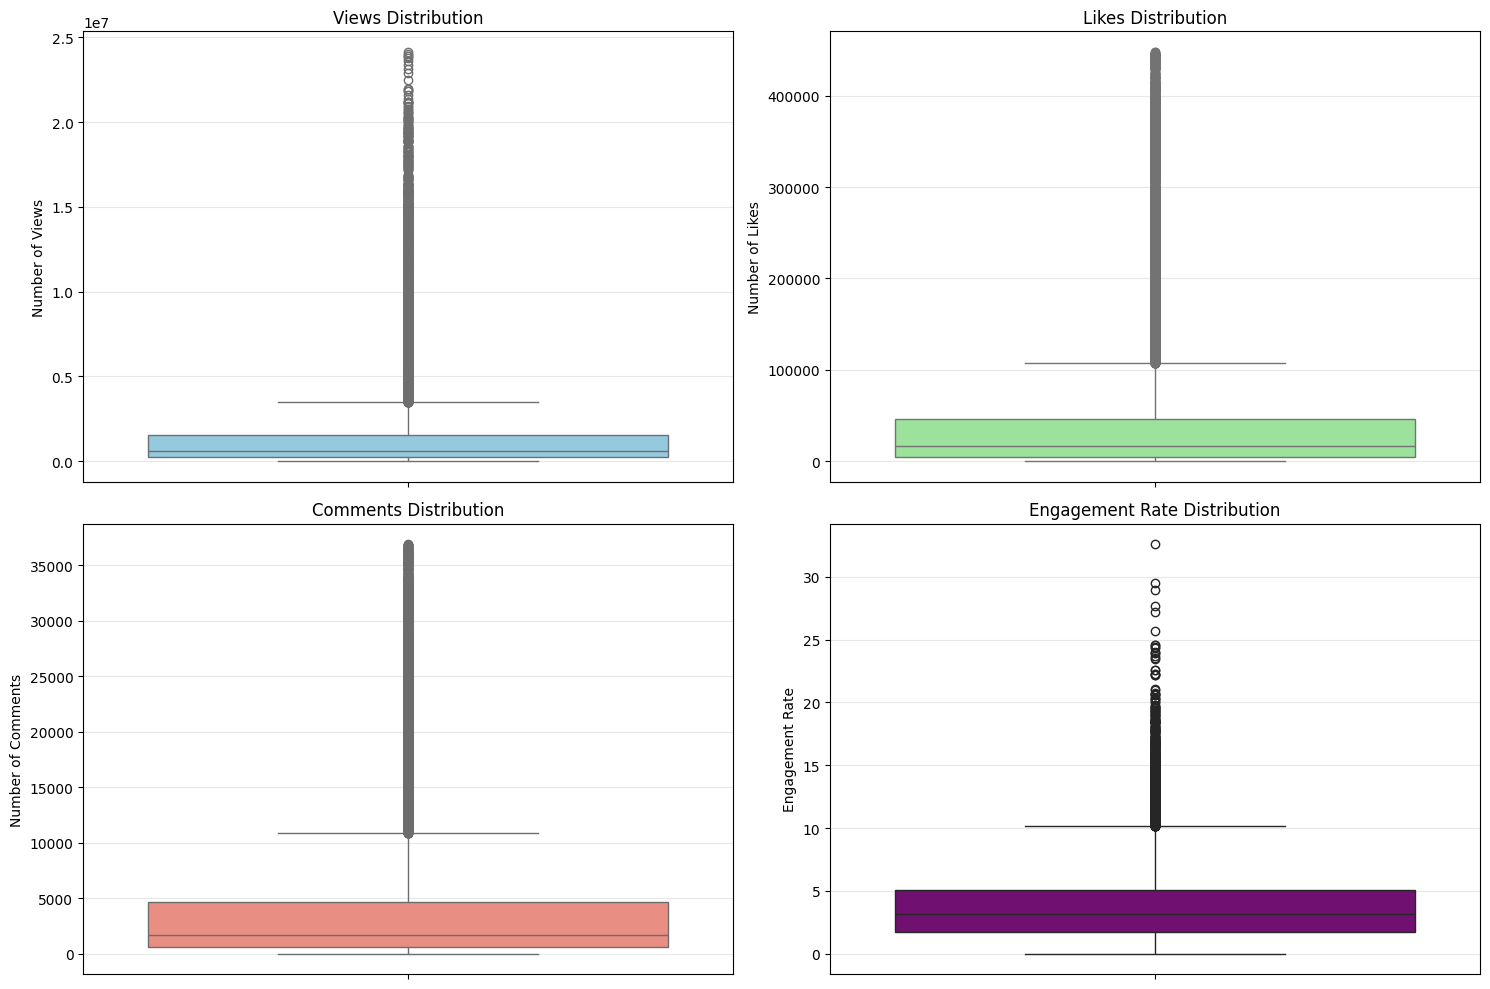


Outlier Analysis:
--------------------------------------------------

VIEWS:
Number of outliers: 3673
Lower bound: -1,743,543.00
Upper bound: 3,508,463.00
Percentage of outliers: 9.47%

LIKES:
Number of outliers: 4240
Lower bound: -56,446.38
Upper bound: 107,440.62
Percentage of outliers: 10.93%

COMMENT_COUNT:
Number of outliers: 4013
Lower bound: -5,626.12
Upper bound: 10,896.88
Percentage of outliers: 10.35%

ENGAGEMENT_RATE:
Number of outliers: 1287
Lower bound: -3.34
Upper bound: 10.16
Percentage of outliers: 3.32%


In [43]:
# Create boxplots for main metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Boxplot for views
sns.boxplot(y=df['views'], ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Views Distribution')
axes[0,0].set_ylabel('Number of Views')

# Boxplot for likes
sns.boxplot(y=df['likes'], ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Likes Distribution')
axes[0,1].set_ylabel('Number of Likes')

# Boxplot for comments
sns.boxplot(y=df['comment_count'], ax=axes[1,0], color='salmon')
axes[1,0].set_title('Comments Distribution')
axes[1,0].set_ylabel('Number of Comments')

# Boxplot for engagement rate
sns.boxplot(y=df['engagement_rate'], ax=axes[1,1], color='purple')
axes[1,1].set_title('Engagement Rate Distribution')
axes[1,1].set_ylabel('Engagement Rate')

plt.tight_layout()
plt.show()

# Detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Print outlier information
metrics = ['views', 'likes', 'comment_count', 'engagement_rate']
print("\nOutlier Analysis:")
print("-" * 50)
for metric in metrics:
    n_outliers, lower, upper = detect_outliers(df, metric)
    print(f"\n{metric.upper()}:")
    print(f"Number of outliers: {n_outliers}")
    print(f"Lower bound: {lower:,.2f}")
    print(f"Upper bound: {upper:,.2f}")
    print(f"Percentage of outliers: {(n_outliers/len(df)*100):.2f}%")
    